In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from committee_learning.ode import SphericalSquaredActivationODE
from committee_learning.initial_conditions import RandomNormalInitialConditions
from committee_learning.simulation import NormalizedSphericalConstraintSimulation
from committee_learning.result import SquareODEResult, SimulationResult
import numpy as np

d_list = [10000]
p = 20
k = 1
gamma0 = 4.
noise = 1e-3
dt = 1e-3
id = 0

ic = {d:RandomNormalInitialConditions(p,k,d,spherical=True, seed=id) for d in d_list}

### Simulations

In [12]:
sims = [
  NormalizedSphericalConstraintSimulation(d,p,k,noise,ic[d].Wteacher,gamma0,'square',ic[d].W0)
  for d in d_list
]

simrs = {}
for d, sim in zip(d_list, sims):
  print(f'Simulating d = {sim.d}')
  simr = SimulationResult(initial_condition='random-spherical')
  simr.from_file_or_run(sim,2+np.log10(sim.d),path='computation-database/sim/')
  simrs[d] = simr

Simulating d = 10000


### ODE

In [14]:
oders = {}
for d in d_list:
  ode = SphericalSquaredActivationODE(p,k,noise,gamma0,ic[d].P,ic[d].Q,ic[d].M,dt)
  oder = SquareODEResult('random-shperical')
  oder.from_file_or_run(ode, 2, path='computation-database/ode/')
  oders[d] = oder

100%|██████████| 90000/90000 [00:15<00:00, 5852.13it/s]


### Plot

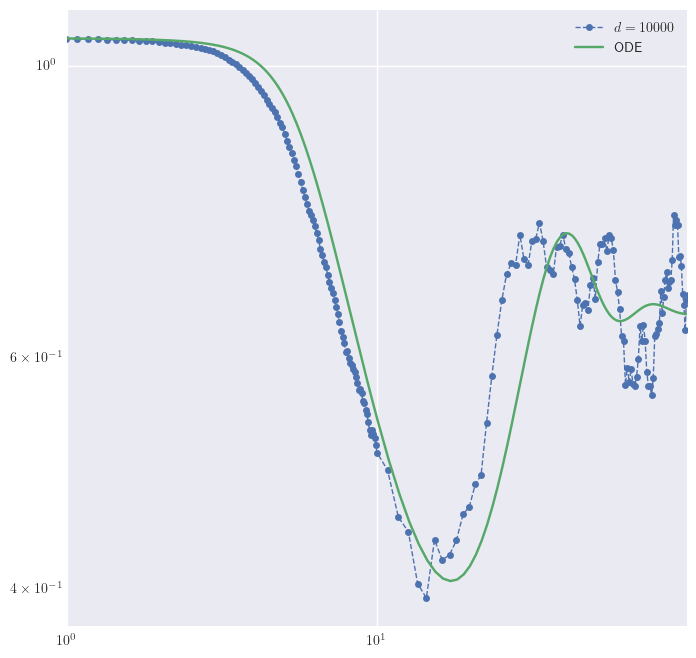

In [21]:
import matplotlib.pyplot as plt
from committee_learning.utilities import plot_style

with plot_style():
  fig, ax = plt.subplots(figsize=(8,8))
  ax.set_xscale('log')
  ax.set_yscale('log')
  ax.set_xlim(1,max(oders[d].times))
  for d in d_list:
    t = np.array(simrs[d].steps) / d
    ax.plot(t, simrs[d].macroscopic_risk(), label=f'$d={d}$',ls='--',lw=1.,marker='o',ms=5.)
    ax.plot(oders[d].times, oders[d].risks, label='ODE')
  ax.legend()
  plt.show()
  


444


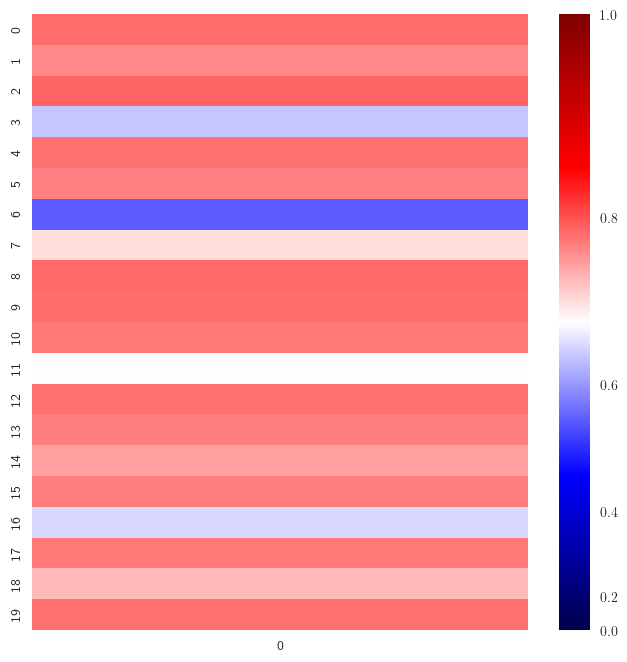

444


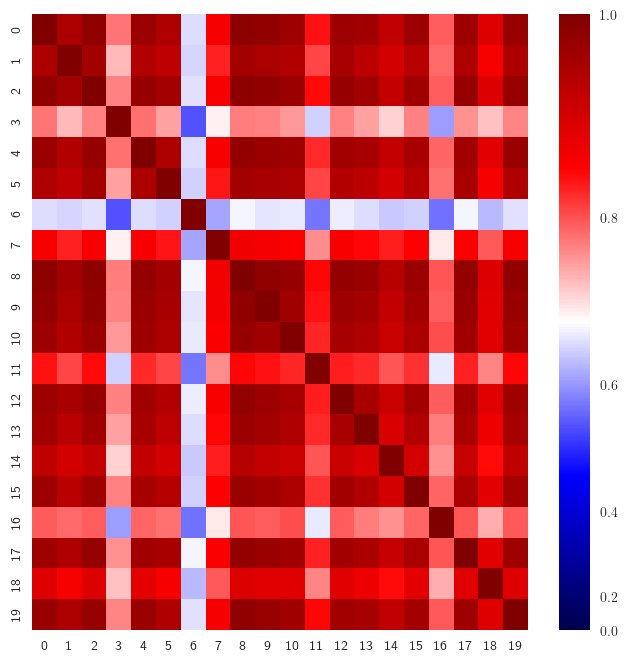

400


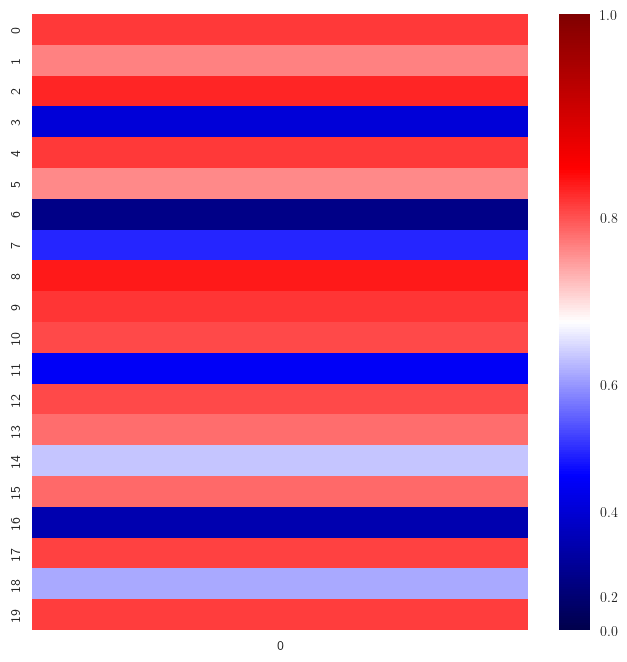

400


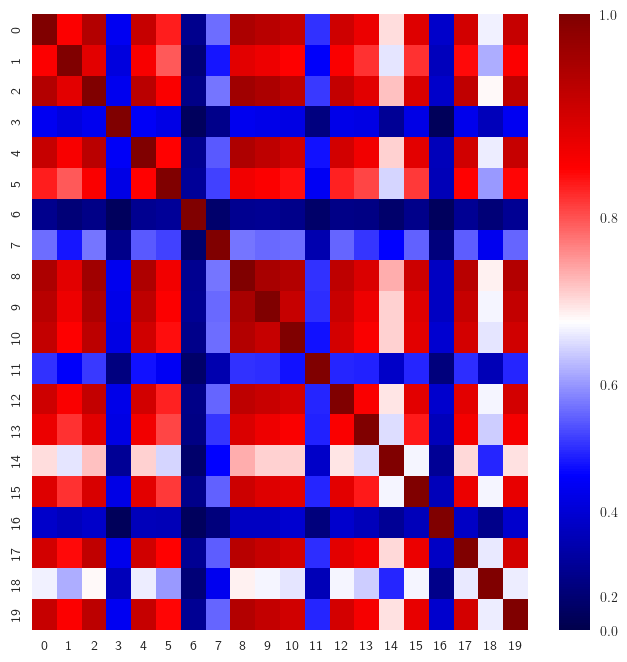

In [19]:
from committee_learning.utilities import macroscopic_variable_plot

t = 5e1
simr = simrs[d]

macroscopic_variable_plot(simr.M_at_time(t))
macroscopic_variable_plot(simr.Q_at_time(t))

macroscopic_variable_plot(simr.M_at_time(1e1))
macroscopic_variable_plot(simr.Q_at_time(1e1))